https://www.youtube.com/watch?v=TCH_1BHY58I

Building makemore Part 2: MLP

Paper implementation - https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf

In [448]:
with open('names.txt', 'r') as f:
    names = f.readlines()



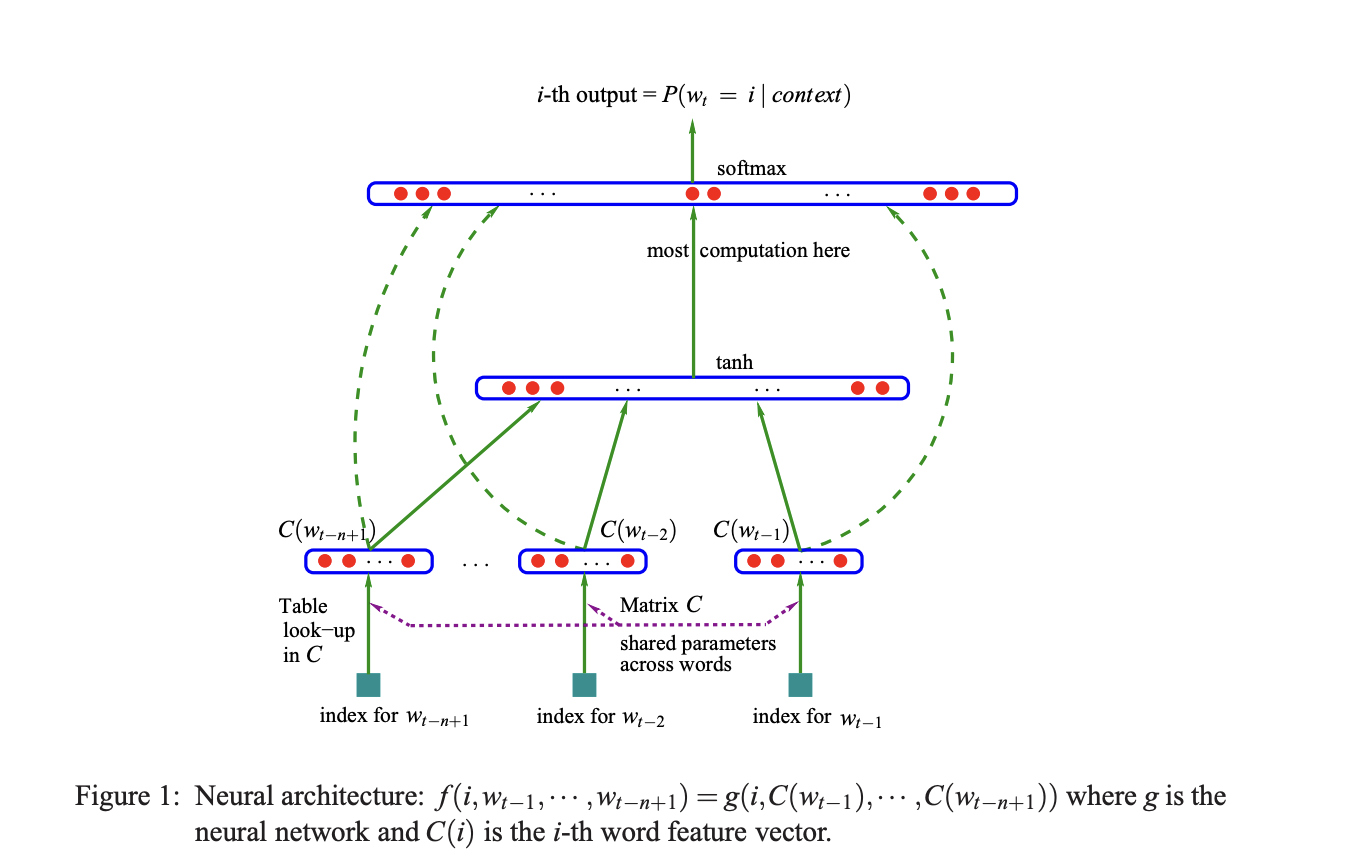

In [449]:
from IPython.display import Image, display

# If image is in the same directory as your notebook
display(Image("model.png"))

# Or with full path
# display(Image("/path/to/my_image.png"))

In [450]:
chars =  ['.'] + sorted(set( ch for name in names for ch in name.strip())) 

print(type(chars))
print(chars)
stoi = { ch:i for i, ch in enumerate(chars)}
itos = { i:ch for i, ch in enumerate(chars)}

print(stoi)
print(itos)



<class 'list'>
['.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
{'.': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}
{0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [451]:
X_train  = []
Y_train = []
X_val = []
Y_val = []
total_len = len(names)
train_len = int(total_len * 0.9)
val_len = total_len - train_len
train_names = names[:train_len]
val_names = names[train_len:]
for name in train_names:
    name =  name.strip()
    context = [0] * 3
    for ch in name + '.':
        input = [itos[c] for c in context]
        
        X_train.append(context)
        Y_train.append(stoi[ch])
        context = context[1:] + [stoi[ch]]
for name in val_names:
    name =  name.strip()
    context = [0] * 3
    for ch in name + '.':
        input = [itos[c] for c in context]
        
        X_val.append(context)
        Y_val.append(stoi[ch])



In [452]:
import torch
X_train = torch.tensor(X_train)
Y_train = torch.tensor(Y_train)
X_val = torch.tensor(X_val)
Y_val = torch.tensor(Y_val)
C = torch.randn((27, 4))
print(X_train.shape)
print(Y_train.shape)
print(C.shape)

torch.Size([205411, 3])
torch.Size([205411])
torch.Size([27, 4])


In [453]:
#forward pass
 

W1 = torch.randn((12, 100))
W2 = torch.randn((100, 27))
parameters = [W1, W2, C]
for p in parameters:
    p.requires_grad = True

        
mini_batch = 128
losses = []
losses_val = []


In [ ]:
best_loss = float('inf')
best_i = 0
for i in range(1000):
    samples = torch.randint(0, X_train.shape[0], (mini_batch,))
    mini_batch_X = X_train[samples]
    mini_batch_Y = Y_train[samples]
    E = C[mini_batch_X]
    E = E.view(-1, 12)
    H = torch.tanh(E @ W1)
    O = H @ W2
    loss = torch.nn.functional.cross_entropy(O, mini_batch_Y) + 0.01 * (W1**2).mean() + 0.01 * (W2**2).mean()
    
    loss.backward()
    losses.append(loss.item())
    lr = 0.1 if len(losses) < 100 else 0.01
    for p in parameters:
        p.data -= p.grad * lr
        p.grad = None
    

    E = C[X_val]
    E = E.view(-1, 12)
    H = torch.tanh(E @ W1)
    O = H @ W2
    loss_val = torch.nn.functional.cross_entropy(O, Y_val)
    print(loss_val.item())
    losses_val.append(loss_val.item())
    print("training loss: ", loss.item())
    print("validation loss: ", loss_val.item())
    if loss_val.item() < best_loss:
        best_loss = loss_val.item()
        best_i = i
print(best_loss, best_i)


14.875489234924316
training loss:  16.745990753173828
validation loss:  14.875489234924316
14.934341430664062
training loss:  15.348078727722168
validation loss:  14.934341430664062
12.597857475280762
training loss:  15.993111610412598
validation loss:  12.597857475280762
11.849885940551758
training loss:  14.621448516845703
validation loss:  11.849885940551758
10.775120735168457
training loss:  13.026902198791504
validation loss:  10.775120735168457
10.469766616821289
training loss:  15.241867065429688
validation loss:  10.469766616821289
9.81430435180664
training loss:  14.561857223510742
validation loss:  9.81430435180664
9.652910232543945
training loss:  12.603775024414062
validation loss:  9.652910232543945
9.293758392333984
training loss:  12.173359870910645
validation loss:  9.293758392333984
9.10594367980957
training loss:  13.55978012084961
validation loss:  9.10594367980957
8.491000175476074
training loss:  12.79911994934082
validation loss:  8.491000175476074
8.4585094451904

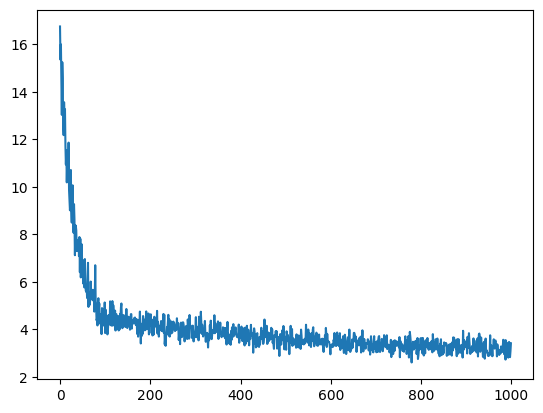

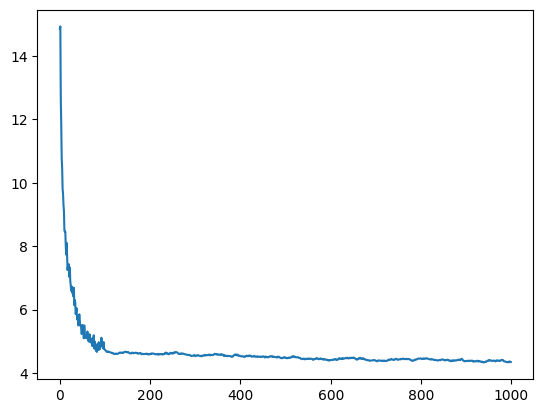

In [455]:
import matplotlib.pyplot as plt
plt.plot(range(len(losses)), losses)
plt.show()

plt.plot(range(len(losses_val)), losses_val)
plt.show()